In [1]:
########## 10 May 2018 - Alec S. Hirschauer ##########
# Today I am going to try to recreate the CMDs and CCDs for NGC 6822 using Python
# (which I had previously made in SuperMongo)
# to simultaneously learn a new plotting language and transfer the plots' utility.
#
# These CMDs and CCDs are from Sewilo et al. (2013) and Whitney et al. (2008),
# and the data come from the catalog of Spitzer sources of Khan et al. (2015)
# matched with IR sources from 2MASS in CasJobs.
#
# Furthermore, I will be making the CMDs and CCDs as number density histograms,
# which will allow us to visualize the data more easily considering that there
# are over 30,000 data points to distinguish in each plot.

In [2]:
# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This last line is new, and is necessary for the number density histograms.

In [3]:
# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDparameters27April2018_ahirschauer.csv')
# This is a table of values with ~30,000 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to 2MASS sources with an "OR" command,
# then downloaded from MAST CasJobs.

In [4]:
# Since the .csv file imported above only has the magnitude values,
# I'll need to set the colors used in the CMDs and CCDs.
# Instead of doing it on a per-figure basis (like before), I've sorted the
# various colors to eliminate duplicates.
#
phot_data['threesixMINUSfourfive'] = phot_data.k36mag.values - phot_data.k45mag.values
phot_data['threesixMINUSfiveeight'] = phot_data.k36mag.values - phot_data.k58mag.values
phot_data['threesixMINUSeightzero'] = phot_data.k36mag.values - phot_data.k80mag.values
phot_data['threesixMINUStwentyfour'] = phot_data.k45mag.values - phot_data.k24mag.values
#
phot_data['fourfiveMINUSfiveeight'] = phot_data.k45mag.values - phot_data.k58mag.values
phot_data['fourfiveMINUSeightzero'] = phot_data.k45mag.values - phot_data.k80mag.values
phot_data['fourfiveMINUStwentyfour'] = phot_data.k45mag.values - phot_data.k24mag.values
#
phot_data['fiveeightMINUSeightzero'] = phot_data.k58mag.values - phot_data.k80mag.values
phot_data['fiveeightMINUStwentyfour'] = phot_data.k58mag.values - phot_data.k24mag.values
#
phot_data['eightzeroMINUStwentyfour'] = phot_data.k80mag.values - phot_data.k24mag.values
#
phot_data['kMINUSthreesix'] = phot_data.kmag.values - phot_data.k36mag.values
phot_data['kMINUSfourfive'] = phot_data.kmag.values - phot_data.k45mag.values

In [5]:
# In my first iteration of making CMDs, I found a few erroneous color values well in excess
# of the standard plot boundaries, which made the axes ludicrously proportioned.
# While clearly I could simply define the scale of the axes such that these
# outliers are skipped, if I wanted to do any analysis of the dataset as a whole
# it is more useful for me to trim them.
#
# These erroneous color values were all in the vicinity of +/-10,000, which come from
# the fact that 'null' values in the catalog of photometric sources had been set to "-9999"
# and therefore a small value minus -9,999 becomes roughly 10,000,
# or -9,999 minus a small value becomes roughly -10,000.
#
# Rather than set individual cuts for every afflicted column (as I had tried to do earlier),
# I am making a global cut of the whole dataframe so that no value is outside of the range
# of -500.0 to +500.0, which hopefully encompasses everything useful (including RA & Dec).
#
phot_data = phot_data[(phot_data < 500.0) & (phot_data > -500.0)]
#
# The above command trims the 'phot_data' dataframe,
# but later on when I plot and/or analyze the data,
# I'd like to specify that we're dealing with a "filtered" data set,
# so the command below does that.
#
filter_phot_data = phot_data

In [6]:
# Now that the colors are identified and the data is filtered, I will make the plots.
# In total, discarding duplicates, there are 16 different CMDs/CCDs I've used from the
# Sewilo et al. (2013) and Whitney et al. (2008) papers, which from now on I will make
# individually as opposed to in groups according to their original figure number.
#
# As a point of comparison, I will make each of the 16 plots twice; once using points
# to represent the data, and once utilizing a number density histogram method.

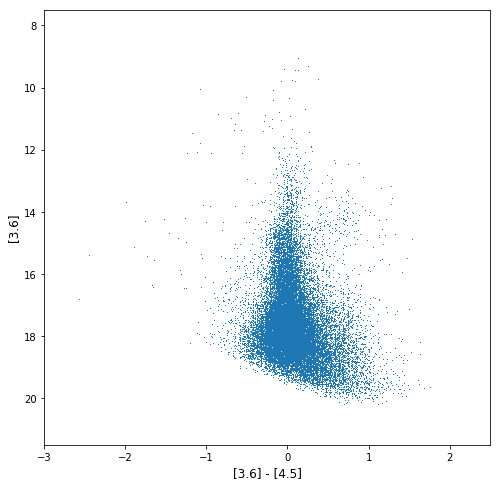

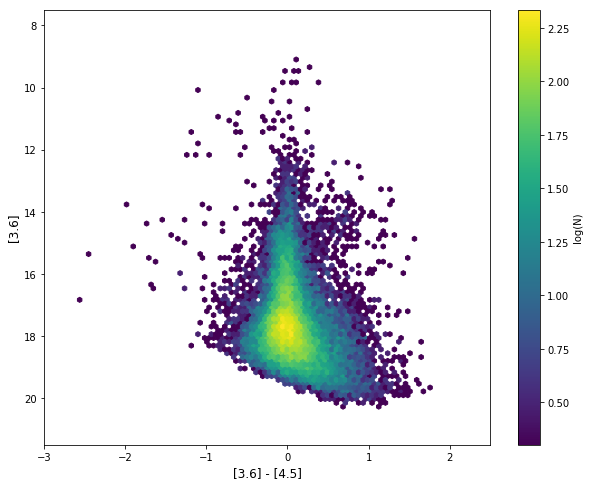

In [7]:
# [3.6] vs. [3.6]-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSfourfive,filter_phot_data.k36mag,',')
plt.xlim(-3.0, 2.5)
plt.ylim(21.5, 7.5)
plt.xlabel('[3.6] - [4.5]', size=12)
plt.ylabel('[3.6]', size=12)
plt.savefig('[3.6]_vs_[3.6]-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 2.5)
plt.ylim(21.5, 7.5)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSfourfive, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 2.5, 21.5, 7.5))
ax1.set_xlabel('[3.6] - [4.5]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[3.6]_vs_[3.6]-[4.5]_hist.pdf')

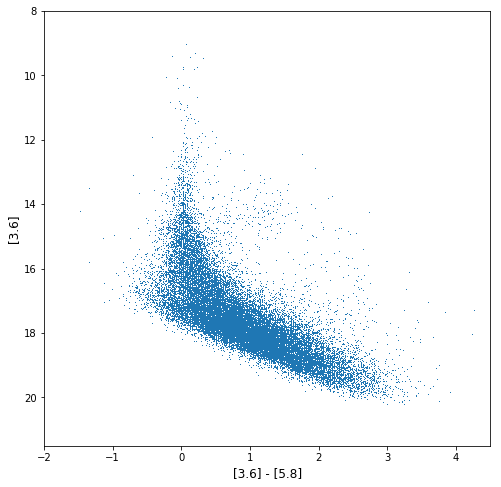

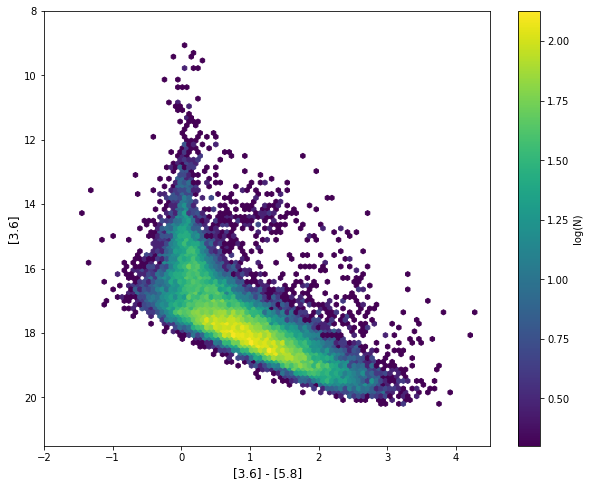

In [8]:
# [3.6] vs. [3.6]-[5.8]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSfiveeight,filter_phot_data.k36mag,',')
plt.xlim(-2.0, 4.5)
plt.ylim(21.5, 8.0)
plt.xlabel('[3.6] - [5.8]', size=12)
plt.ylabel('[3.6]', size=12)
plt.savefig('[3.6]_vs_[3.6]-[5.8]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 4.5)
plt.ylim(21.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSfiveeight, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 4.5, 21.5, 8.0))
ax1.set_xlabel('[3.6] - [5.8]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[3.6]_vs_[3.6]-[5.8]_hist.pdf')

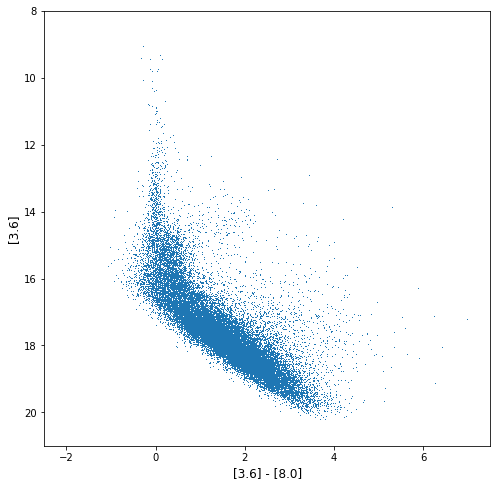

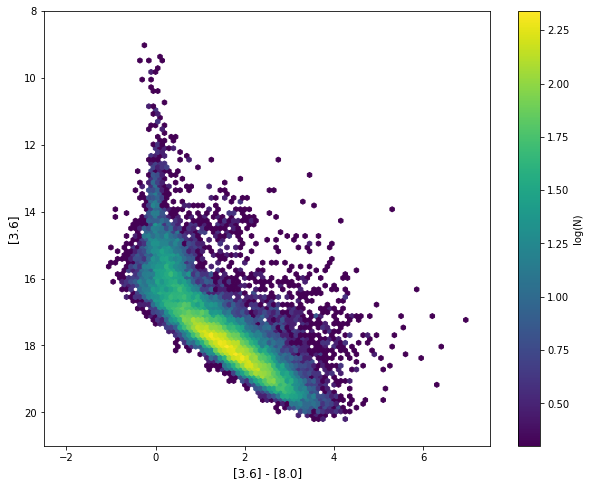

In [9]:
# [3.6] vs. [3.6]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSeightzero,filter_phot_data.k36mag,',')
plt.xlim(-2.5, 7.5)
plt.ylim(21.0, 8.0)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[3.6]', size=12)
plt.savefig('[3.6]_vs_[3.6]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 7.5)
plt.ylim(21.0, 8.0)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSeightzero, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 7.5, 21.0, 8.0))
ax1.set_xlabel('[3.6] - [8.0]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[3.6]_vs_[3.6]-[8.0]_hist.pdf')

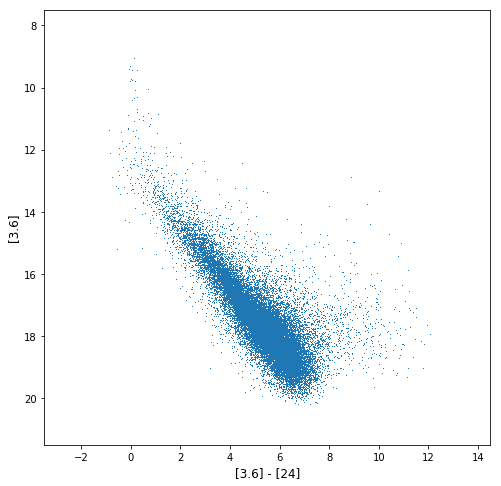

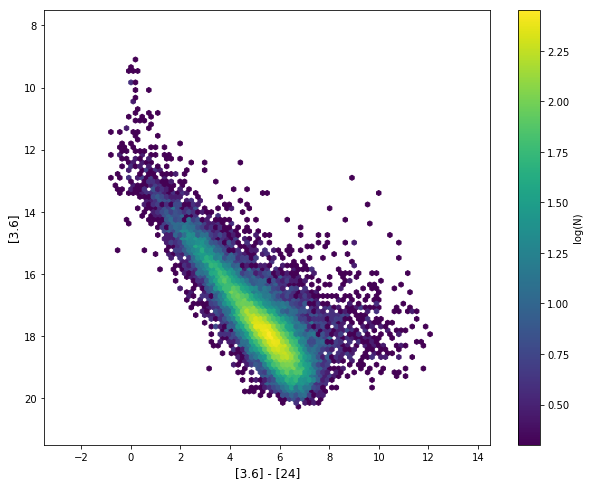

In [10]:
# [3.6] vs. [3.6]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUStwentyfour,filter_phot_data.k36mag,',')
plt.xlim(-3.5, 14.5)
plt.ylim(21.5, 7.5)
plt.xlabel('[3.6] - [24]', size=12)
plt.ylabel('[3.6]', size=12)
plt.savefig('[3.6]_vs_[3.6]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 14.5)
plt.ylim(21.5, 7.5)
im1 = ax1.hexbin(filter_phot_data.threesixMINUStwentyfour, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 14.5, 21.5, 7.5))
ax1.set_xlabel('[3.6] - [24]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[3.6]_vs_[3.6]-[24]_hist.pdf')

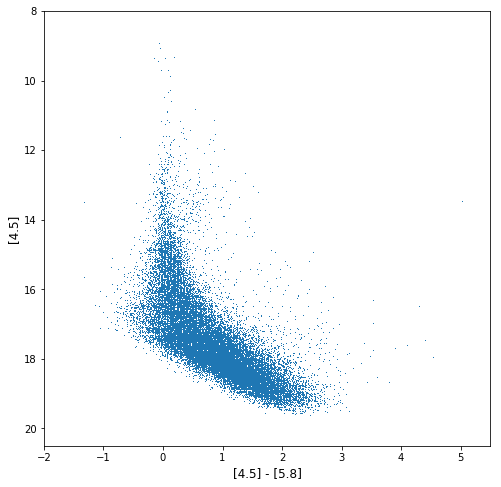

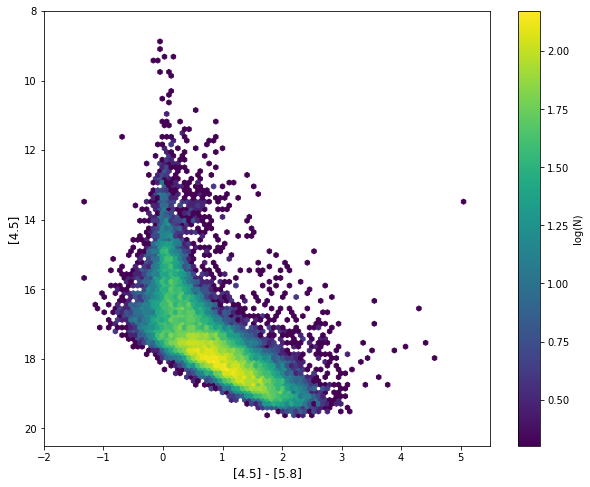

In [11]:
# [4.5] vs. [4.5]-[5.8]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUSfiveeight,filter_phot_data.k45mag,',')
plt.xlim(-2.0, 5.5)
plt.ylim(20.5, 8.0)
plt.xlabel('[4.5] - [5.8]', size=12)
plt.ylabel('[4.5]', size=12)
plt.savefig('[4.5]_vs_[4.5]-[5.8]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 5.5)
plt.ylim(20.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUSfiveeight, filter_phot_data.k45mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 5.5, 20.5, 8.0))
ax1.set_xlabel('[4.5] - [5.8]', size=12)
ax1.set_ylabel('[4.5]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[4.5]_vs_[4.5]-[5.8]_hist.pdf')

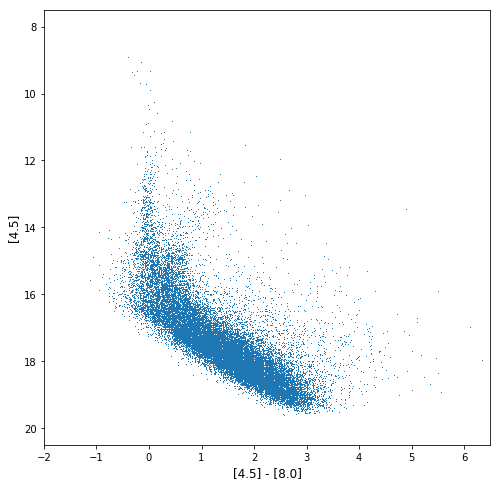

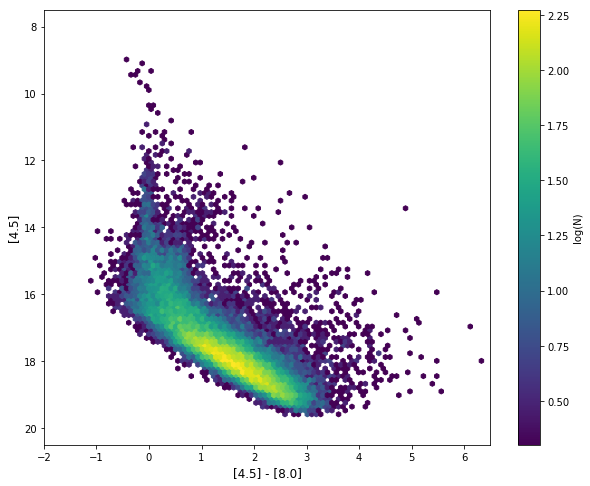

In [12]:
# [4.5] vs. [4.5]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k45mag,',')
plt.xlim(-2.0, 6.5)
plt.ylim(20.5, 7.5)
plt.xlabel('[4.5] - [8.0]', size=12)
plt.ylabel('[4.5]', size=12)
plt.savefig('[4.5]_vs_[4.5]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 6.5)
plt.ylim(20.5, 7.5)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUSeightzero, filter_phot_data.k45mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 6.5, 20.5, 7.5))
ax1.set_xlabel('[4.5] - [8.0]', size=12)
ax1.set_ylabel('[4.5]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[4.5]_vs_[4.5]-[8.0]_hist.pdf')

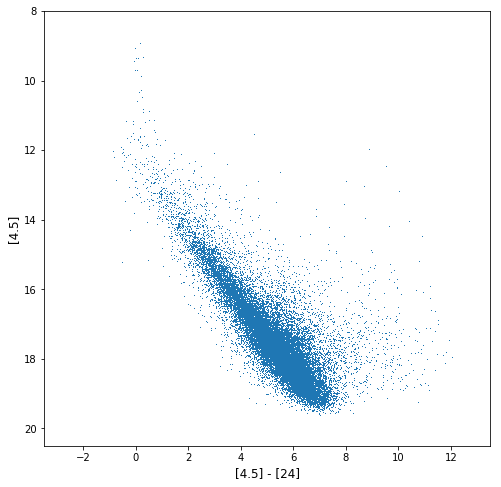

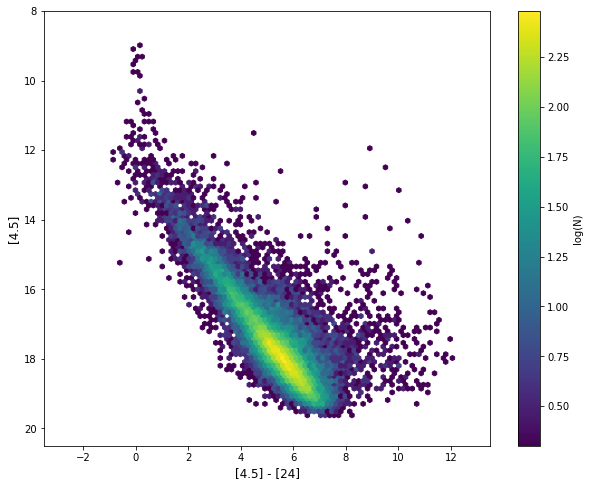

In [13]:
# [4.5] vs. [4.5]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUStwentyfour,filter_phot_data.k45mag,',')
plt.xlim(-3.5, 13.5)
plt.ylim(20.5, 8.0)
plt.xlabel('[4.5] - [24]', size=12)
plt.ylabel('[4.5]', size=12)
plt.savefig('[4.5]_vs_[4.5]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 13.5)
plt.ylim(20.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUStwentyfour, filter_phot_data.k45mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 13.5, 20.5, 8.0))
ax1.set_xlabel('[4.5] - [24]', size=12)
ax1.set_ylabel('[4.5]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[4.5]_vs_[4.5]-[24]_hist.pdf')

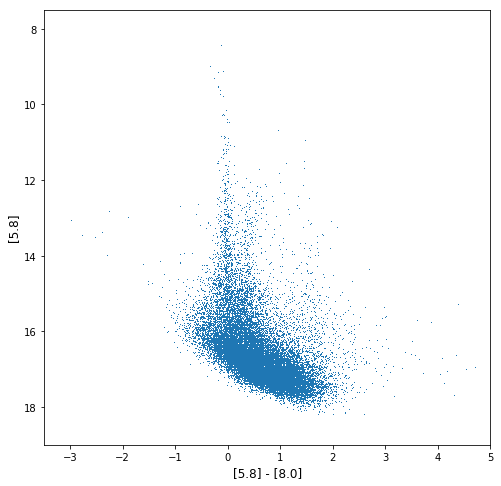

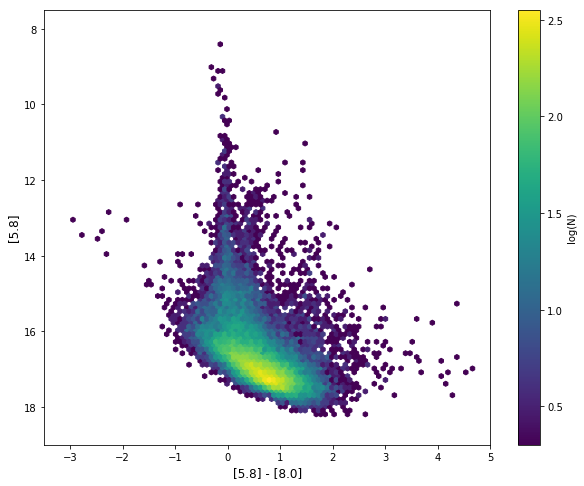

In [14]:
# [5.8] vs. [5.8]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fiveeightMINUSeightzero,filter_phot_data.k58mag,',')
plt.xlim(-3.5, 5.0)
plt.ylim(19.0, 7.5)
plt.xlabel('[5.8] - [8.0]', size=12)
plt.ylabel('[5.8]', size=12)
plt.savefig('[5.8]_vs_[5.8]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 5.0)
plt.ylim(19.0, 7.5)
im1 = ax1.hexbin(filter_phot_data.fiveeightMINUSeightzero, filter_phot_data.k58mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 5.0, 19.0, 7.5))
ax1.set_xlabel('[5.8] - [8.0]', size=12)
ax1.set_ylabel('[5.8]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[5.8]_vs_[5.8]-[8.0]_hist.pdf')

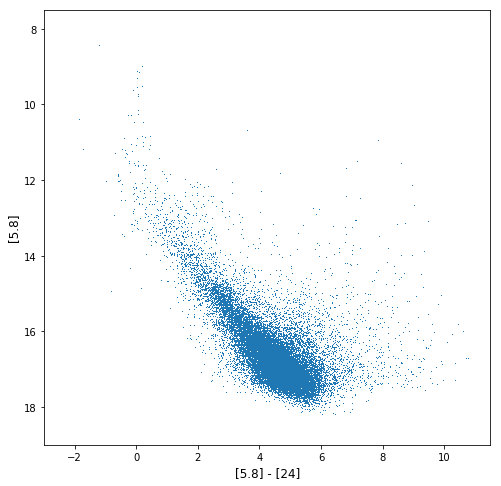

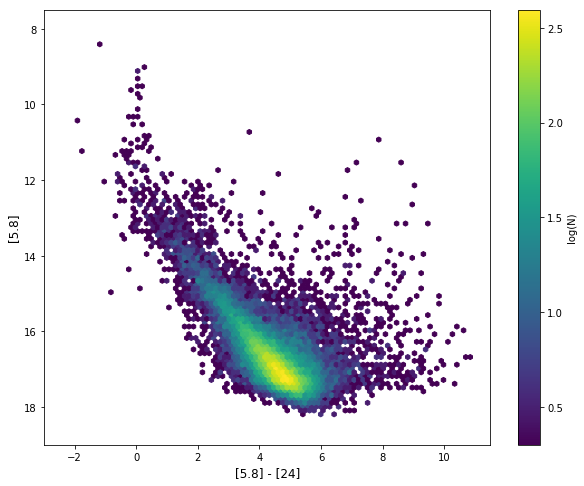

In [15]:
# [5.8] vs. [5.8]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fiveeightMINUStwentyfour,filter_phot_data.k58mag,',')
plt.xlim(-3.0, 11.5)
plt.ylim(19.0, 7.5)
plt.xlabel('[5.8] - [24]', size=12)
plt.ylabel('[5.8]', size=12)
plt.savefig('[5.8]_vs_[5.8]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.5)
plt.ylim(19.0, 7.5)
im1 = ax1.hexbin(filter_phot_data.fiveeightMINUStwentyfour, filter_phot_data.k58mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.5, 19.0, 7.5))
ax1.set_xlabel('[5.8] - [24]', size=12)
ax1.set_ylabel('[5.8]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[5.8]_vs_[5.8]-[24]_hist.pdf')

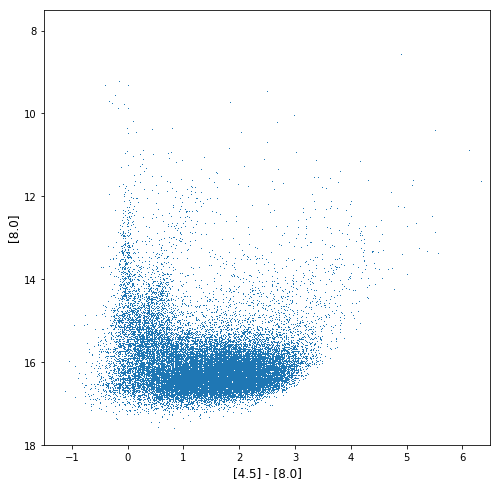

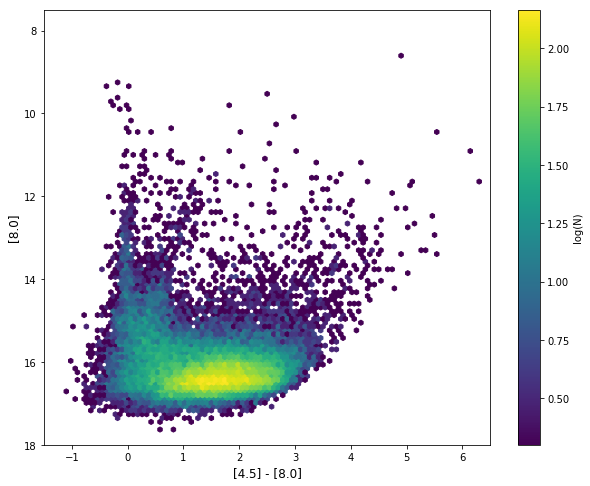

In [16]:
# [8.0] vs. [4.5]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k80mag,',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 7.5)
plt.xlabel('[4.5] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
plt.savefig('[8.0]_vs_[4.5]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 7.5)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUSeightzero, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 6.5, 18.0, 7.5))
ax1.set_xlabel('[4.5] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[8.0]_vs_[4.5]-[8.0]_hist.pdf')

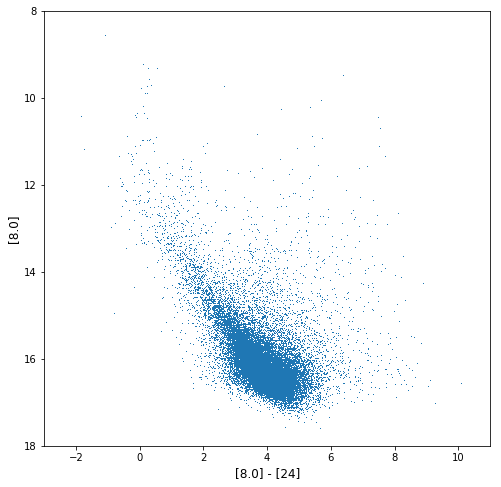

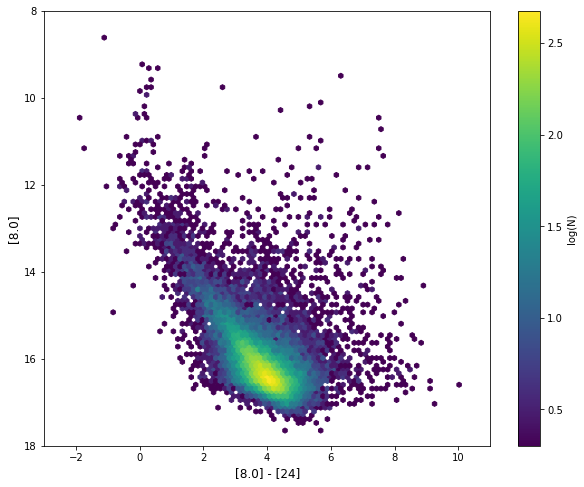

In [17]:
# [8.0] vs. [8.0]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k80mag,',')
plt.xlim(-3.0, 11.0)
plt.ylim(18.0, 8.0)
plt.xlabel('[8.0] - [24]', size=12)
plt.ylabel('[8.0]', size=12)
plt.savefig('[8.0]_vs_[8.0]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.0)
plt.ylim(18.0, 8.0)
im1 = ax1.hexbin(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.0, 18.0, 8.0))
ax1.set_xlabel('[8.0] - [24]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[8.0]_vs_[8.0]-[24]_hist.pdf')

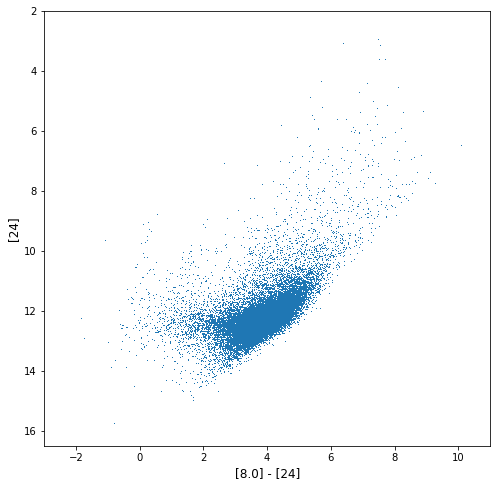

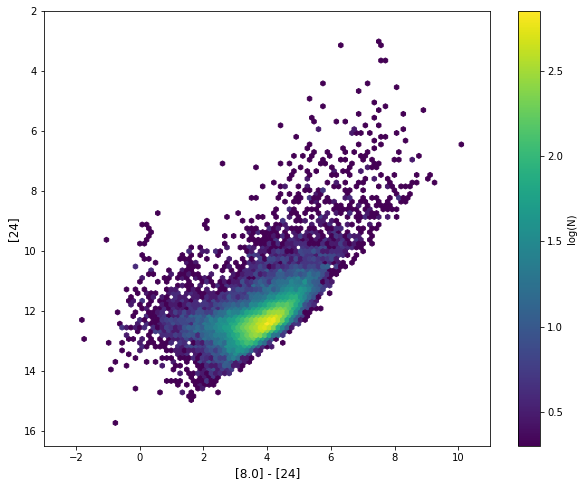

In [18]:
# [24] vs. [8.0]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k24mag,',')
plt.xlim(-3.0, 11.0)
plt.ylim(16.5, 2.0)
plt.xlabel('[8.0] - [24]', size=12)
plt.ylabel('[24]', size=12)
plt.savefig('[24]_vs_[8.0]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.0)
plt.ylim(16.5, 2.0)
im1 = ax1.hexbin(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.k24mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.0, 16.5, 2.0))
ax1.set_xlabel('[8.0] - [24]', size=12)
ax1.set_ylabel('[24]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[24]_vs_[8.0]-[24]_hist.pdf')

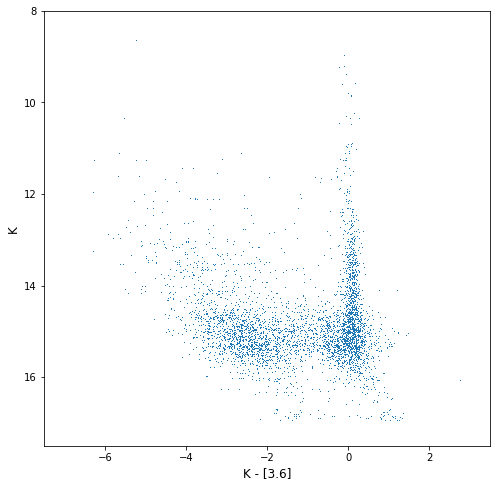

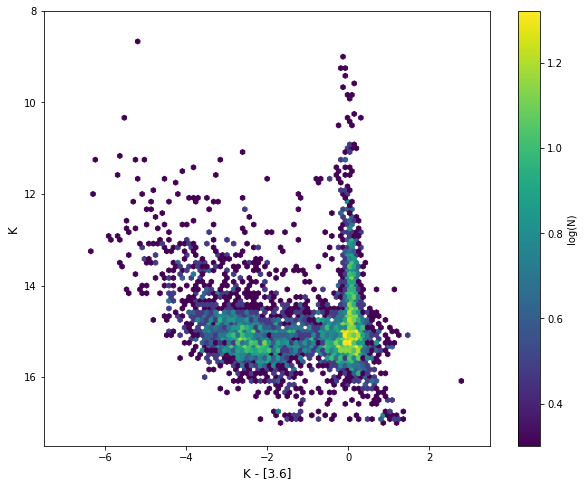

In [19]:
# K vs. K-[3.6]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSthreesix,filter_phot_data.kmag,',')
plt.xlim(-7.5, 3.5)
plt.ylim(17.5, 8.0)
plt.xlabel('K - [3.6]', size=12)
plt.ylabel('K', size=12)
plt.savefig('K_vs_K-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-7.5, 3.5)
plt.ylim(17.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSthreesix, filter_phot_data.kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-7.5, 3.5, 17.5, 8.0))
ax1.set_xlabel('K - [3.6]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('K_vs_K-[3.6]_hist.pdf')

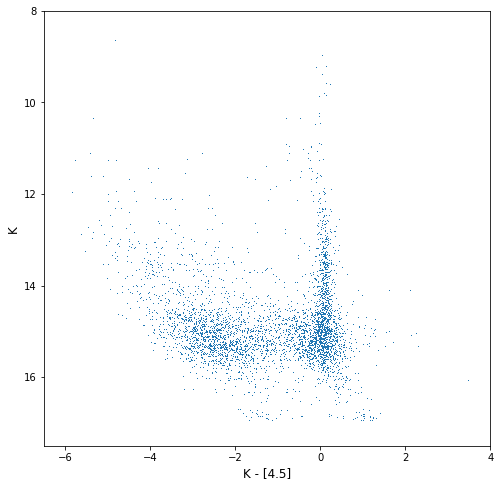

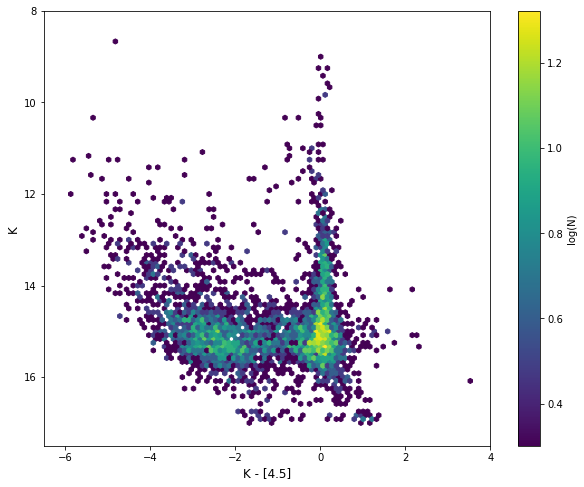

In [20]:
# K vs. K-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSfourfive,filter_phot_data.kmag,',')
plt.xlim(-6.5, 4.0)
plt.ylim(17.5, 8.0)
plt.xlabel('K - [4.5]', size=12)
plt.ylabel('K', size=12)
plt.savefig('K_vs_K-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-6.5, 4.0)
plt.ylim(17.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSfourfive, filter_phot_data.kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-6.5, 4.0, 17.5, 8.0))
ax1.set_xlabel('K - [4.5]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('K_vs_K-[4.5]_hist.pdf')

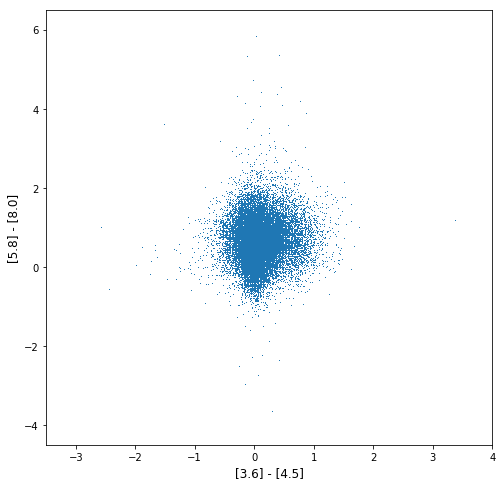

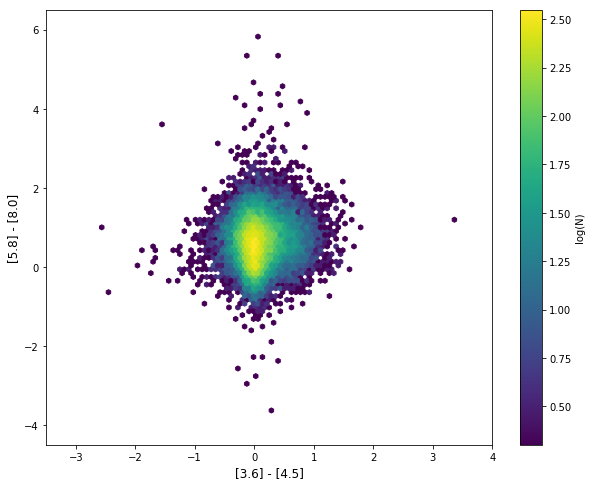

In [21]:
# [5.8]-[8.0] vs. [3.6]-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSfourfive, filter_phot_data.fiveeightMINUSeightzero,',')
plt.xlim(-3.5, 4.0)
plt.ylim(-4.5, 6.5)
plt.xlabel('[3.6] - [4.5]', size=12)
plt.ylabel('[5.8] - [8.0]', size=12)
plt.savefig('[5.8]-[8.0]_vs_[3.6]-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 4.0)
plt.ylim(-4.5, 6.5)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSfourfive, filter_phot_data.fiveeightMINUSeightzero, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 4.0, -4.5, 6.5))
ax1.set_xlabel('[3.6] - [4.5]', size=12)
ax1.set_ylabel('[5.8] - [8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[5.8]-[8.0]_vs_[3.6]-[4.5]_hist.pdf')

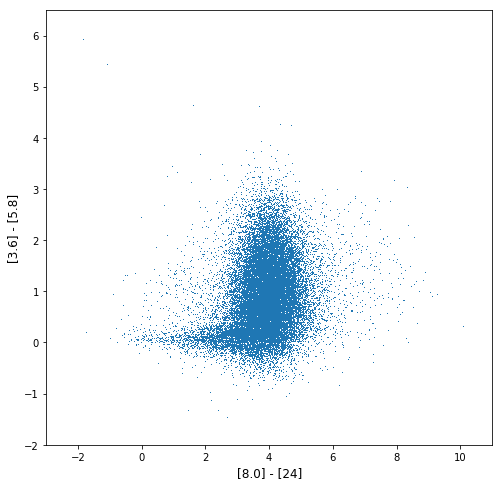

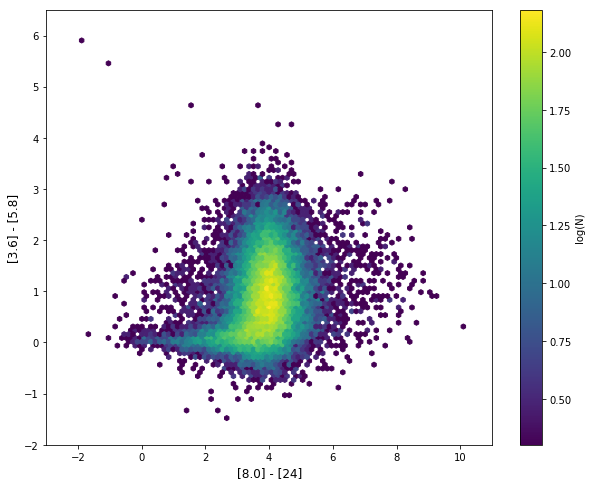

In [22]:
# [3.6]-[5.8] vs. [8.0]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.threesixMINUSfiveeight,',')
plt.xlim(-3.0, 11.0)
plt.ylim(-2.0, 6.5)
plt.xlabel('[8.0] - [24]', size=12)
plt.ylabel('[3.6] - [5.8]', size=12)
plt.savefig('[3.6]-[5.8]_vs_[8.0]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.0)
plt.ylim(-2.0, 6.5)
im1 = ax1.hexbin(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.threesixMINUSfiveeight, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.0, -2.0, 6.5))
ax1.set_xlabel('[8.0] - [24]', size=12)
ax1.set_ylabel('[3.6] - [5.8]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.savefig('[3.6]-[5.8]_vs_[8.0]-[24]_hist.pdf')

In [23]:
# These look great!
# I had to fix some of the plot ranges to accomodate the data,
# even compared to the earlier Python and SuperMongo versions,
# but in the end I feel like this frame the distributions well.
#
# The next step will be learning how to use the program "glueviz",
# which as Bram showed me, allows a mapping of the spatial distribution
# of the given points onto a .fits image of the galaxy NGC 6822
# based on where the points lay in the CMDs/CCDs.
#
# This uses the RA & Dec parameters in the input file and should,
# for example, allow me to see if a given structure in the above plots
# corresponds to any specific region of the galaxy.